In [142]:
from zeno_client import ZenoClient, ZenoMetric
import pandas as pd
import json
import os
from dotenv import load_dotenv

load_dotenv(override=True)

False

In [143]:
root_dir = '/data/user_data/jhsia2/dbqa'
results_dir = os.path.join(root_dir, 'reader_results')
client = ZenoClient('zen_EZ7LuqItWgObcQmIvNZVytvhtTh8JMs2HrSzzfXsiIg')


In [87]:
with open('/data/user_data/jhsia2/dbqa/data/id2title.json', 'r') as file:
    # Use json.dump to write the list of dictionaries to the file
    id2title = json.load(file)

In [4]:
# def combine_gold_and_compiled(output_data, gold_answer_set, gold_wiki_par_id_set, gold_wiki_par_text_set, gold_title_set):
#     for i, od in enumerate(output_data):
#         od['gold_answer_set'] = gold_answer_set[i]
#         od['gold_title_set'] = gold_title_set[i]
#         od['gold_id_set'] = gold_wiki_par_id_set[i]
#         od['gold_text_set'] = gold_wiki_par_text_set[i]
#     return output_data

In [121]:
wiki_par_id_set_size = []
wiki_id_set_size = []
for d in gold_data:
    wiki_par_id_set_size.append(len(d['output']['wiki_par_id_set']))
    wiki_id_set_size.append(len(d['output']['wiki_id_set']))

2.0110714285714284 0.11125386945804515 1 4


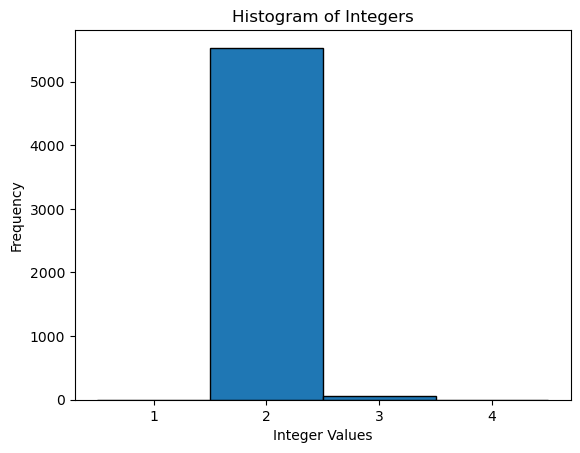

2.0 0.0 2 2


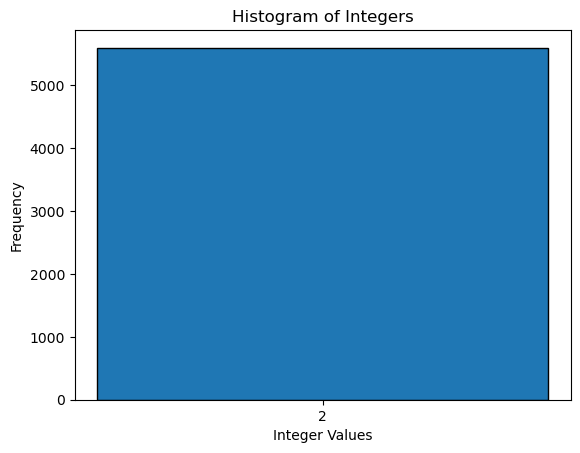

In [123]:
get_hist_info(wiki_par_id_set_size)
get_hist_info(wiki_id_set_size)

In [110]:
import numpy as np

import matplotlib.pyplot as plt
def get_hist_info(size_set):
    print(np.mean(size_set), np.std(size_set), np.min(size_set), np.max(size_set))
        # gold_wiki_size = [len(s) for s in gold_wiki_par_id_set]

    plt.hist(size_set, bins=np.arange(min(size_set)-0.5, max(size_set)+1.5, 1), edgecolor='black')

    # Set the labels and title for the plot
    plt.xlabel('Integer Values')
    plt.ylabel('Frequency')
    plt.title('Histogram of Integers')

    # Set x-ticks to correspond to the integer values
    plt.xticks(range(min(size_set), max(size_set) + 1))

    # Display the plot
    plt.show()

In [144]:
def combine_gold_and_compiled(output_data, gold_data):
    
    for od, gd in zip(output_data, gold_data):
        if(output_data['id'] ! = gold_data['id']):
            print(od, gd)
            break
        # od['gold_title_set'] = gd['output']['answer_set']
        od['gold_answer_set'] = gd['output']['answer_set']
        od['gold_wiki_id_set'] = gd['output']['wiki_id_set']
        od['gold_wiki_par_id_set'] = gd['output']['wiki_par_id_set']
        od['gold_title_set'] = gd['output']['title_set']
    return output_data

SyntaxError: invalid syntax (545052788.py, line 4)

In [5]:
# def get_gold_sets(gold_data):
#     gold_answer_set = []
#     gold_wiki_par_id_set = []
#     gold_wiki_par_text_set = []
#     gold_title_set = []
#     for d in gold_data:
#         answer_set = set()
#         wiki_par_id_set = set()
#         wiki_par_text_set = set()
#         title_set = set()
        
#         answer_set = set()
#         for a in d['output']:
#             answer_set.add(a['answer'])
#             for r  in a['retrieved']:
#                 wiki_par_id = f"{r['wikipedia_id']}_{r['start_paragraph_id']}"
#                 title_set.add(r['title'])
#                 # if (wiki_par_id not in gold_wiki_par_id_set):
#                 wiki_par_id_set.add(wiki_par_id)
#                 wiki_par_text_set.add(r['text'])
#         gold_answer_set.append(answer_set)
#         gold_title_set.append(title_set)
#         gold_wiki_par_id_set.append(wiki_par_id_set)
#         gold_wiki_par_text_set.append(wiki_par_text_set)
#     return gold_answer_set, gold_wiki_par_id_set, gold_wiki_par_text_set, gold_title_set 

In [88]:
dataset = 'hotpotqa'

In [149]:
project = client.create_project(
    name=f"Document QA - {dataset}",
    view={
        "data": {"type": "text", 
                 "label": "question:"
                },
        "label": {"type": "text"},
        "output": {
            "type": "vstack",
            "keys": {
                "gold answer set": {"type": "text", "label": "gold answer set: "},
                "gold title set": {"type": "text", "label": "gold title set: "},
                # "gold context set": {"type": "text", "label": "gold text set: "},
                "answer": {"type": "text", "label": "reader answer: "},
                "retrieved context": {
                    "type": "list",
                    "elements": {
                        "type": "vstack",
                        "keys": {
                            "score": {"type": "text", "label": "score: "},
                            "wiki_id": {"type": "markdown"},
                            "text": {"type": "text", "label": "text: "},
                            "wiki_id_match": {"type": "text", "label": "wiki_id match: "},
                            "wiki_par_id_match": {"type": "text", "label": "wiki_par_id match: "}
                        },
                    },
                    "collapsible": "bottom",
                    "border": True,
                    "pad": True,
                },
            },
        },
    },
    description="Document-grounded question answering with Wikipedia",
    metrics=[
        ZenoMetric(name="max retrieved score", type="mean", columns=["max_score"]),
        ZenoMetric(name="avg retrieved score", type="mean", columns=["avg_score"]),
        ZenoMetric(name="exact_match", type="mean", columns=["exact_match"]),
        ZenoMetric(name="f1", type="mean", columns=["f1"]),
        ZenoMetric(name="gold wiki_par_id set size", type="mean", columns=["gold wiki_par_id set size"]),
        ZenoMetric(name="substring_match", type="mean", columns=["substring_match"]),
        ZenoMetric(name="any wiki_id_match", type="mean", columns=["any wiki_id_match"]),
        ZenoMetric(name="any wiki_par_id_match", type="mean", columns=["any wiki_par_id_match"]),
        ZenoMetric(name="precision - wiki_id_match", type="mean", columns=["precision wiki_id_match"]),
        ZenoMetric(name="precision - wiki_par_id_match", type="mean", columns=["precision wiki_par_id_match"]),
        ZenoMetric(name="recall - wiki_id_match", type="mean", columns=["recall wiki_id_match"]),
        ZenoMetric(name="recall - wiki_par_id_match", type="mean", columns=["recall wiki_par_id_match"]),
    ],
)

Successfully updated project.
Access your project at  https://hub.zenoml.com/project/jhsia2/Document%20QA%20-%20hotpotqa


In [120]:

with open(os.path.join(root_dir, 'data', f"gold-{dataset}-dev-kilt.json"), "r") as f:
    gold_data = json.load(f)
gold_data = sorted(gold_data, key=lambda x: x["id"])
# gold_answer_set, gold_wiki_par_id_set, gold_wiki_par_text_set, gold_title_set = get_gold_sets(gold_data)
data_df = pd.DataFrame({"question": [d["input"] for d in gold_data], 'id': [d['id'] for d in gold_data]})
project.upload_dataset(data_df, id_column="id", data_column="question")

  0%|          | 0/1 [00:00<?, ?it/s]

Successfully uploaded data


In [9]:
# gold_wiki_size = [len(s) for s in gold_wiki_par_id_set]
# import numpy as np
# np.mean(gold_wiki_size), np.std(gold_wiki_size), np.min(gold_wiki_size), np.max(gold_wiki_size)
# import matplotlib.pyplot as plt
# plt.hist(gold_wiki_size, bins=np.arange(min(gold_wiki_size)-0.5, max(gold_wiki_size)+1.5, 1), edgecolor='black')

# # Set the labels and title for the plot
# plt.xlabel('Integer Values')
# plt.ylabel('Frequency')
# plt.title('Histogram of Integers')

# # Set x-ticks to correspond to the integer values
# plt.xticks(range(min(gold_wiki_size), max(gold_wiki_size) + 1))

# # Display the plot
# plt.show()

In [150]:
import numpy as np
def get_reader_df(top_k, combined_data):
    return pd.DataFrame(
        {
            "question": [d['input'] for d in combined_data],
            "id": [d['id'] for d in combined_data],
            "output": [
                json.dumps(
                    {   
                        "gold answer set": ', '.join(d['gold_answer_set']),
                        "gold title set": ', '.join(d['gold_title_set']),
                        # "gold context set": '\n'.join(d['gold_text_set']),
                        # "gold context": d['gold_context'],
                        "answer": d["output"]["answer"],
                        "retrieved context": [
                            {
                                "wiki_id": None,
                                "text": None,
                                "score": None,
                                "wiki_id_match": None,
                                "wiki_par_id_match": None
                            }
                        ] if top_k == 'baseline' else [
                            {
                                "wiki_id": "[{idx}]({url})".format(
                                    idx=id2title[r["wiki_id"]],
                                    url="https://en.wikipedia.org/?curid="
                                    + r["wiki_id"],
                                ),
                                "text": r["text"],
                                "score": r["score"],
                                "wiki_id_match": r["wiki_id_match"],
                                "wiki_par_id_match": r["wiki_par_id_match"]
                            }
                        for r in d["output"]["retrieved"]
                        ],
                    }
                )
                for d in combined_data
            ],
            "gold wiki_par_id set size": [
                len(d["gold_wiki_par_id_set"]) for d in combined_data
            ],
            "max_score": [None for d in combined_data] if top_k == 'baseline' else [
                d["output"]["retrieved"][0]["score"] for d in combined_data
            ],
            "avg_score": [None for d in combined_data] if top_k == 'baseline' else [
                np.mean([r["score"] for r in d["output"]["retrieved"]]) for d in combined_data
            ],
            "f1": [
                d["output"]["answer_evaluation"]["f1"] for d in combined_data
            ],
            "exact_match": [
                d["output"]["answer_evaluation"]["exact_match"] for d in combined_data
            ],
            "substring_match": [
                d["output"]["answer_evaluation"]["substring_match"] for d in combined_data
            ],
            "any wiki_id_match": [None for d in combined_data] if top_k == 'baseline' else [
                d["output"]["summary context evaluation"]["wiki_id_match"] for d in combined_data
            ],
            "any wiki_par_id_match": [None for d in combined_data] if top_k == 'baseline' else [
                d["output"]["summary context evaluation"]["wiki_par_id_match"] for d in combined_data
            ],
            "precision wiki_id_match": [None for d in combined_data] if top_k == 'baseline' else [
                get_precision(set([r["wiki_id"] for r in d["output"]["retrieved"]]), d['gold_wiki_id_set']) for d in combined_data
            ],
            "precision wiki_par_id_match": [None for d in combined_data] if top_k == 'baseline' else [
                get_precision(set([r["wiki_par_id"] for r in d["output"]["retrieved"]]), d['gold_wiki_par_id_set']) for d in combined_data
            ],
            "recall wiki_id_match": [None for d in combined_data] if top_k == 'baseline' else [
                get_recall(set([r["wiki_id"] for r in d["output"]["retrieved"]]), d['gold_wiki_id_set']) for d in combined_data
            ],
            "recall wiki_par_id_match": [None for d in combined_data] if top_k == 'baseline' else [
                get_recall(set([r["wiki_par_id"] for r in d["output"]["retrieved"]]), d['gold_wiki_par_id_set']) for d in combined_data
            ]
        }
    )
    # return output_df
# output_df["id"] = 

In [145]:
def get_precision(guess_wiki_id_set, gold_wiki_id_set):
    precision = np.mean([[s in gold_wiki_id_set] for s in guess_wiki_id_set])
    return precision
def get_recall(guess_wiki_id_set, gold_wiki_id_set):
    # print(guess_wiki_id_set)
    # print(gold_wiki_id_set)
    recall = np.mean([[s in guess_wiki_id_set] for s in gold_wiki_id_set]) if len(gold_wiki_id_set) > 0 else 0.0
    return recall

In [146]:
reader_model = 'llama'
retriever_model = 'bm25'
# dataset = 'hot'
top_ks= ["baseline", "top1", "top2", "top3", "top5", "top10", "top20", "top30", "top50"]
# top_ks = ['top2']
for top_k in top_ks:
    print(top_k)
    with open(os.path.join(results_dir, reader_model, dataset, retriever_model, f"exp2/{top_k}/reader_results_zeno.json"), "r") as f:
        data = json.load(f)
    combined_data = combine_gold_and_compiled(data, gold_data)
    # if (top_k != 'baseline'):
    output_df = get_reader_df(top_k, combined_data)
    # else:
    #     output_df = get_baseline_df(combined_data)
    # break
    if top_k == 'baseline':
        project.upload_system(
        output_df, name= (reader_model + ' ' + top_k), id_column="id", output_column="output"
    )
    else:
        project.upload_system(
            output_df, name= (retriever_model + ' ' + reader_model + ' ' + top_k), id_column="id", output_column="output"
        )
    # if (top_k == 'top1'):
    #     break

baseline


FileNotFoundError: [Errno 2] No such file or directory: '/data/user_data/jhsia2/dbqa/reader_results/llama/hotpotqa/bm25/exp2/baseline/reader_results_zeno.json'

In [151]:
reader_model = 'flanT5'
retriever_model = 'bm25'
# dataset = 'hot'
top_ks= ["baseline", "top1", "top2", "top3", "top5", "top10", "top20", "top30", "top50"]
# top_ks = ['top5']
for top_k in top_ks:
    print(top_k)
    with open(os.path.join(results_dir, reader_model, dataset, retriever_model, f"exp2/{top_k}/reader_results_zeno.json"), "r") as f:
        data = json.load(f)
    combined_data = combine_gold_and_compiled(data, gold_data)
    # if (top_k != 'baseline'):
    output_df = get_reader_df(top_k, combined_data)
    # else:
    #     output_df = get_baseline_df(combined_data)
    # break
    if top_k == 'baseline':
        project.upload_system(
        output_df, name= (reader_model + ' ' + top_k), id_column="id", output_column="output"
    )
    else:
        project.upload_system(
            output_df, name= (retriever_model + ' ' + reader_model + ' ' + top_k), id_column="id", output_column="output"
        )
    # if (top_k == 'top1'):
    #     break

baseline


  0%|          | 0/3 [00:00<?, ?it/s]

Successfully uploaded system
top1


  0%|          | 0/5 [00:00<?, ?it/s]

Successfully uploaded system
top2


  0%|          | 0/7 [00:00<?, ?it/s]

Successfully uploaded system
top3


  0%|          | 0/8 [00:00<?, ?it/s]

Successfully uploaded system
top5


  0%|          | 0/13 [00:00<?, ?it/s]

Successfully uploaded system
top10


  0%|          | 0/25 [00:00<?, ?it/s]

Successfully uploaded system
top20


  0%|          | 0/49 [00:00<?, ?it/s]

Successfully uploaded system
top30


  0%|          | 0/67 [00:00<?, ?it/s]

Successfully uploaded system
top50


  0%|          | 0/106 [00:00<?, ?it/s]

Successfully uploaded system
